# Missing data:
#=============

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

#### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations.
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, 
within the dataset. In other words, those missing data points are a random subset of the data. 

There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [8]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [9]:
df[df['Age'].isnull()].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          158
Embarked         0
dtype: int64

if we observe the above stats, the maximum value where the age is missing cabin is also missing, as the data is 
being collected after the accident people age is missing as no one to able to confirm it, same way the cabin. This both 
might have relation, and can't be considered as completely missing random. Going to main dataset we can see Embarked is 
one which is completely random

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the 
dataset.

In [11]:
# converting NaN to 1 and 0 in cabin

import numpy as np

df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)


In [12]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [13]:
# finding percentage

df['cabin_null'].mean()

0.7710437710437711

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [15]:
#comparing cabin with survived column.
df.groupby(['Survived'])


In [17]:
df.groupby(['Survived']).['cabin_null'].mean

SyntaxError: invalid syntax (<ipython-input-17-f276369543ee>, line 1)

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean() # in above mean is a function missed the paranthesis

"""
the above value will give in survived (1) how many have cabin_null (0.608 ) and in not survived how many have cabin 
missing

"""

#### Missing At Random (MAR)
Men -- hide the sarlary  from survey


women -- hiding the age from survey

in a particular data set men will be not putting the salary and woman may hide the age.

### Techniques of missing value

1. Mean,median and mode replacement
2. Random sample imputation
3. Capturing NAN values with new Features
4. End of Distribution imputation
5. Arbitiary imputation
6. Frequent Category imputation


##### Mean,median and mode imputation

When to appy: this type of impution has assumption that the data is completely missing at random (MCAR)
We solve by replacing NAN with the most frequent occurance of the varaible 

In [87]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [19]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
## lets go and see % of null value
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
def impute_nan(df,varaible,median):
    df[varaible+"_median"]=df[varaible].fillna(median)

In [22]:
median = df.Age.median()
median

28.0

In [23]:
impute_nan(df,'Age',median)

In [24]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [25]:
##### in above scenario mean is not calculated as it may result in outliers

In [26]:
df.Age_median.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age_median, Length: 88, dtype: int64

In [27]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [28]:
#pd. set_option('max_rows', 500)
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [29]:
df.Age.value_counts().loc[28]

25

In [30]:
df.Age_median.value_counts().loc[28]

202

In [31]:
## to fine after imputation what is effect we can find standard deviation

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


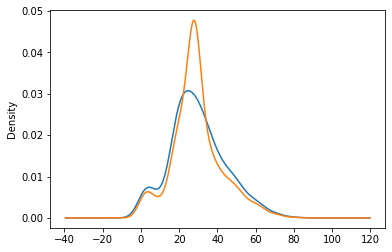

In [32]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df.Age.plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax)

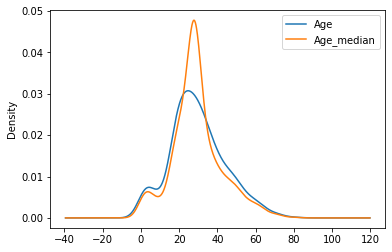

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
df.Age.plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

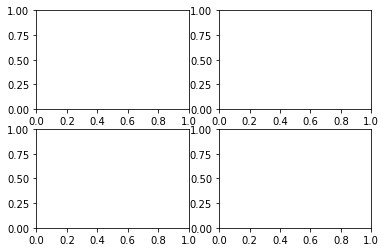

In [34]:
## what imparct subplot have
## https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

fig = plt.figure()
fig.add_subplot(221)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
plt.show()

### Advantage and Disadvantages of mean,median and mode imputation

### Advantage:

1.Easy to implement ( roubust to outlier )
2. Faster way to obtain the complete dataset

### Disadvantages:

1. Change or Distrion in original variance of data ( include standard deviation )
2. Impacts Correlation

Note: For categorial data we can use mode.


In [80]:
### What happens if implement mean imputation instead of median 

df_test =df

In [52]:
def impute_nan1(df_test,varaible,mean):
    df_test[varaible+"_mean"]=df_test[varaible].fillna(mean)

In [53]:
mean=df_test.Age.mean()
mean

29.69911764705882

In [54]:
df_test.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [56]:
impute_nan1(df_test,'Age',mean)

In [42]:
df_test.head()

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [43]:
print(df_test['Age'].std())
print(df_test['Age_mean'].std())

14.526497332334044
13.002015226002884


In [44]:
df.head()

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


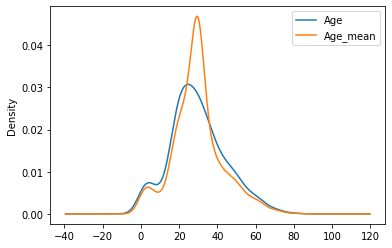

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
df_test.Age.plot(kind='kde',ax=ax)
df_test.Age_mean.plot(kind='kde',ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

In [64]:
# in the above case implementing mean will also not affect much the results.
# dropping df_test and df['Agemean']
df_test.drop(['Age_mean'],axis=1,inplace=True)

In [47]:
df_test

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [66]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [65]:
# instead of using df_test=df while copying should used df_test=df.copy() ==> shallow and deep copy concept

df_test

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [83]:
df_test.drop(['Survived','Age'],axis=1,inplace=True)

In [84]:
df_test.drop(['Fare'],axis=1,inplace=True)

In [91]:
df_test.drop([890])

""
0
1
2
3
4
...
885
886
887
888


In [96]:
for i in range(888):
    df_test.drop([i],inplace=True)

In [97]:
df_test

""
888
889
890


In [98]:
# df is been recreated after running the code for df in above cell
# df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


## Random sample imputation:

Random sample imputation do take random obseravtion from data set and use this observation to replace NAN value.

When to use : It need to be used when the data are missing completely at random ( MCAR )

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].isnull().sum()

177

In [103]:
# generating a random value
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) 
# random_state make sure that each execution does not change the sample value
# sum() is needed to replace for 177 null values.
# what is not sum() is used, it will through error see next cell?

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [16]:
df['Age'].dropna().sample(df['Age'].isnull(),random_state=0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [25]:
def impute_nan(df,varaible,median):
    df[varaible+"_median"]=df[varaible].fillna(median)
    df[varaible+"_random"]=df[varaible]
    
    #it will have the random sample to fill na
    
    random_sample=df[varaible].dropna().sample(df[varaible].isnull().sum(),random_state=0)
    
    # pandas need to have same index to merge the dataset
    
    random_sample.index=df[df[varaible].isnull()].index
    df.loc[df[varaible].isnull(),varaible+"_random"]=random_sample

In [22]:
median = df.Age.median()
median

28.0

In [23]:
impute_nan(df,"Age",median)

In [24]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [27]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

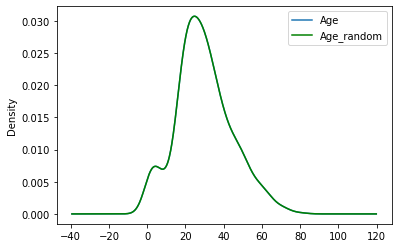

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

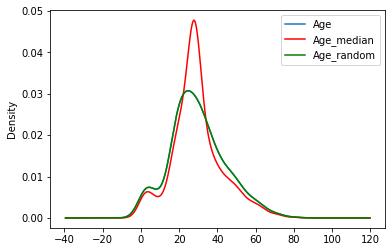

In [31]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

##### Advantage:
1. Easy to implement
2. Very less Distrotion in variance

#### Disadvantage:
1. Every situation randomness won't work

### Capturing NAN values with new Features

It works well if the data are not missing completely at random

In [32]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [34]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [38]:
df.Age_NAN.value_counts()

0    714
1    177
Name: Age_NAN, dtype: int64

In [40]:
df1=df[df['Age_NAN']==1]
df1

,Survived,Age,Fare,Age_NAN
5,0,NaN,8.4583,1
17,1,NaN,13.0000,1
19,1,NaN,7.2250,1
26,0,NaN,7.2250,1
28,1,NaN,7.8792,1
...,...,...,...,...
859,0,NaN,7.2292,1
863,0,NaN,69.5500,1
868,0,NaN,9.5000,1
878,0,NaN,7.8958,1


In [46]:
df.loc[df['Age_NAN']==1] #https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

,Survived,Age,Fare,Age_NAN
5,0,NaN,8.4583,1
17,1,NaN,13.0000,1
19,1,NaN,7.2250,1
26,0,NaN,7.2250,1
28,1,NaN,7.8792,1
...,...,...,...,...
859,0,NaN,7.2292,1
863,0,NaN,69.5500,1
868,0,NaN,9.5000,1
878,0,NaN,7.8958,1


In [48]:
df['Age'].mean()

29.69911764705882

In [49]:
df['Age'].median()

28.0

In [50]:
df['Age'].fillna(df['Age'].mean(),inplace=True) #can be replaced with median or mean

In [51]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.000000,7.2500,0
1,1,38.000000,71.2833,0
2,1,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,0,35.000000,8.0500,0
5,0,29.699118,8.4583,1
6,0,54.000000,51.8625,0
7,0,2.000000,21.0750,0
8,1,27.000000,11.1333,0
9,1,14.000000,30.0708,0


In [52]:
df.corr()

,Survived,Age,Fare,Age_NAN
Survived,1.000000,-6.980852e-02,0.257307,-9.219652e-02
Age,-0.069809,1.000000e+00,0.091566,-1.465772e-16
Fare,0.257307,9.156609e-02,1.000000,-1.007071e-01
Age_NAN,-0.092197,-1.465772e-16,-0.100707,1.000000e+00


##### Advantages

1.Easy to implement
2.Capture the importance of missing values

#### Disadvantage

1.creating additional Features (curse of Dimensinality)

### End of Distribution imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects the missing data is valuable). 

https://www.udig.com/digging-in/feature-engineering-handling-missing-data/

In [53]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


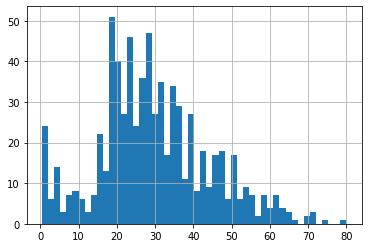

In [55]:
df.Age.hist(bins=50)

In [56]:
df.Age.mean()+3*df.std() # region in 3rd portion of standard normal distribution

Survived     31.158895
Age          73.278610
Fare        178.779403
dtype: float64

In [57]:
df.Age.mean()+3*df.Age.std()

73.27860964406095

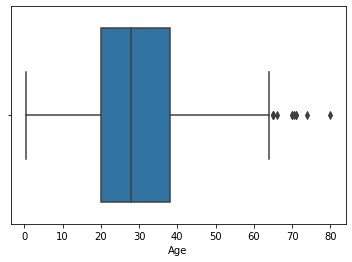

In [58]:
### finding outlier
import seaborn as sns
sns.boxplot('Age',data=df)

In [66]:
def impute_nan(df,variable,median,etrem):
    df[variable+"_enddistribution"]=df[variable].fillna(etrem)
    df[variable].fillna(median,inplace=True)

In [67]:
etrem=df.Age.mean()+3*df.Age.std()
median=df.Age.median()

In [68]:
print(etrem)
print(median)

73.27860964406095
28.0


In [69]:
impute_nan(df,'Age',median,etrem)

In [70]:
df.head(10)

,Survived,Age,Fare,Age_enddistribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


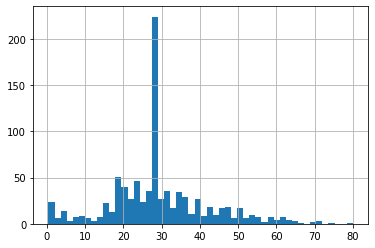

In [71]:
df['Age'].hist(bins=50)

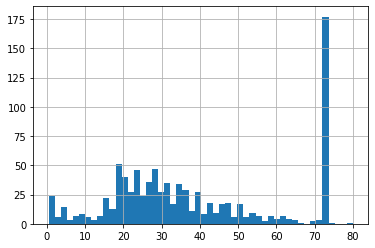

In [72]:
df['Age_enddistribution'].hist(bins=50)

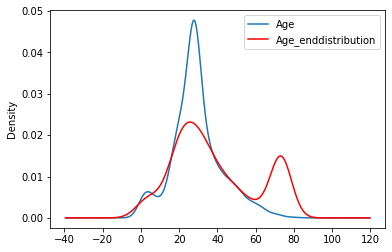

In [73]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_enddistribution.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

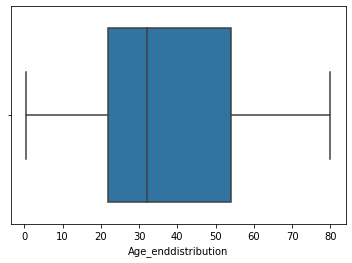

In [75]:
sns.boxplot('Age_enddistribution',data=df)

#### Advantages:
1.Easy to implement
2. Capturing the importance of missingess if there is one
3. In some cases, Outlier are removed 

### Disadvantages:

1. Distrots the originals distribution of the variable
2. If missingess is not important it may mask the predicting power of original variable by distroting its distribution
3. If the number of NA is big, it will mask the outlier in the distribution
4. IF the number of NA is big, the replaced value will be considered as outlier and pre-processed in subsequent feature 
engineering

#### Arbitrary value imputation

It consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def impute_nan(df,varaible):
    df[varaible+'_hundred']=df[varaible].fillna(100)
    df[variable+'_Zero']=df[varaible].fillna(0)
    

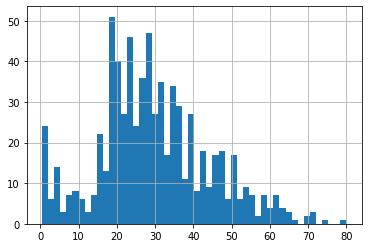

In [3]:
df['Age'].hist(bins=50)

Arbitary value should not be used more frequently used. So using the end of outliers from both the side here using more
than 80 and 0 or less than zero will be used as arbitary value 

### Advantages

1. Easy to implement
2. Capture the importance of missing value if there is one

### Disadvantages

1. Distrots the original distribution of variable
2. If missing value is not important, it may mask the predictive power of the original variable by distroting the distribution
3. Hard to decide which value to use

#### How to Handle categroical missing value

### frequent category Imputation

In [1]:
import pandas as pd
df=pd.read_csv('loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [4]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [5]:
# percantage of missing value
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [12]:
df.shape

(1460, 4)

In [13]:
# now on observung BsmtQual and GrageType is having less missing value we can replacw with most frequently used value 

df.groupby(['BsmtQual'])

In [14]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [15]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True)

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [16]:
import matplotlib.pyplot as plt

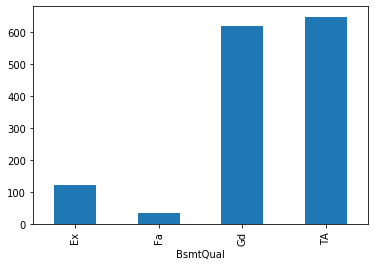

In [17]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

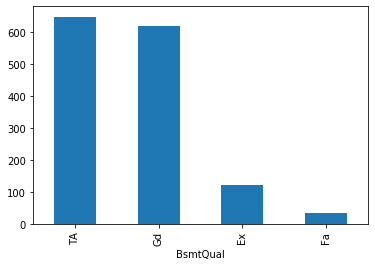

In [20]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

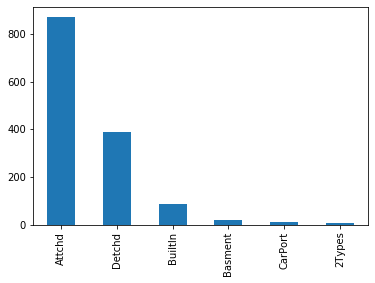

In [21]:
df['GarageType'].value_counts().plot.bar()

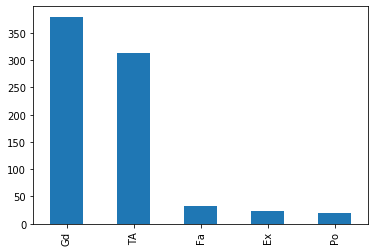

In [23]:
df['FireplaceQu'].value_counts().plot.bar()

In [25]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [26]:
df['GarageType'].value_counts()[0]

870

In [27]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [28]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [31]:
#### Replacing function

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [32]:
for festures in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,festures)

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [36]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [37]:
# user can also use mode as below
df['GarageType'].mode()

0    Attchd
dtype: object

### Advantages:
#================

1. Easy to implement
2. Faster way to implement

#### Disadvantages

1. Since we are using more frequent labels it may use them in an over represented way if there are many NAN.
2. It distrots the relation of most frequent label

In [51]:
#### Adding the variable to capture NaN

df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [52]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [53]:
## finding out most frequent catergory
df['BsmtQual'].mode()

0    TA
dtype: object

In [54]:
df['BsmtQual'].mode()[0]

'TA'

In [55]:
frequent = df['BsmtQual'].mode()[0]

In [56]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [57]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [58]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_Var      0
dtype: int64

In [59]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

In [60]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [61]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [62]:
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_Var        0
FireplaceQu_var     0
dtype: int64

#### suppose if you have more frequent category we just replace NAN with a new category

In [63]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [64]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [65]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [66]:
for festures in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,festures)

In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [68]:
# now we created 3 new features. We can now drop the old feature and do data analysis on newly created feature
# instead of creating new features we can create in same features.
df1=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [69]:
df1

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


In [73]:
df1['BsmtQual_newvar'].value_counts()

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual_newvar, dtype: int64